# Find the probability of measurement of 1

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from numpy import pi
from qiskit.quantum_info import Statevector

from qiskit.visualization import plot_histogram

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(0, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.cp(pi / 6, qreg_q[0], qreg_q[1])
circuit.cp(pi / 6, qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])

state = Statevector(circuit)

state.draw("Latex")

<IPython.core.display.Latex object>

In [2]:
circuit.draw()

┌───┐                  ┌───┐
q_0: ┤ H ├─■────────■───────┤ H ├
     ├───┤ │P(π/6)  │P(π/6) └───┘
q_1: ┤ X ├─■────────■────────────
     └───┘

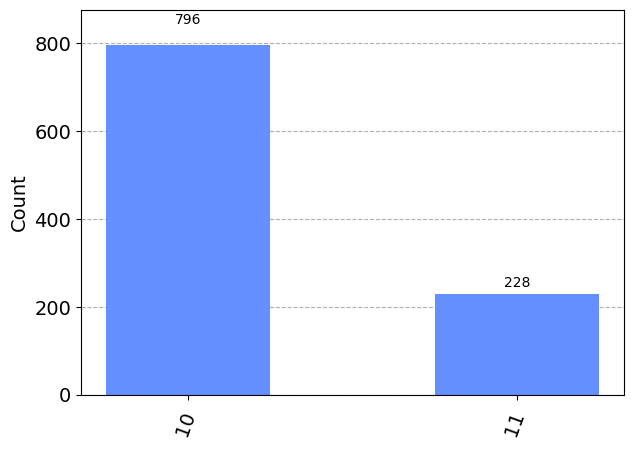

In [3]:
def measure_and_plot(circuit):
    circuit.measure_all()
    sim = Aer.get_backend('aer_simulator')
    job = execute(circuit, sim)
    result = job.result()
    counts = result.get_counts()
    return counts

plot_histogram(measure_and_plot(circuit))